# Question1
# Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixels of both images identical.

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
# Python 3.8 is required
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np
from utils import display_images

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

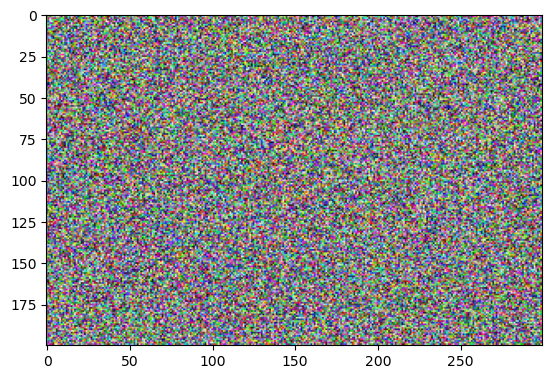

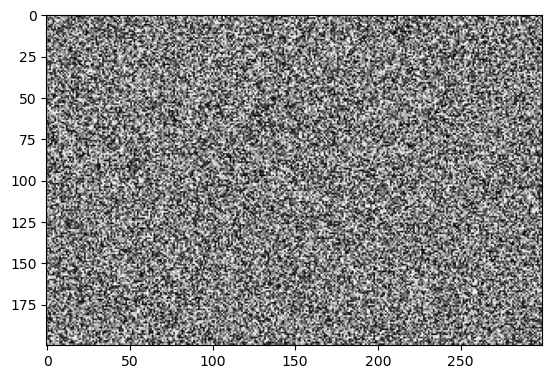

Images created with dimensions: 300x200
Total pixels in each image: 60000


In [4]:
import numpy as np
from PIL import Image

# Set dimensions
width, height = 300, 200

# Create color noise image
color_noise = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
#color_image = Image.fromarray(color_noise)
plt.imshow(color_noise,cmap="gray",vmin=0,vmax=255)
plt.show()

# Create grayscale noise image
grayscale_noise = np.random.randint(0, 256, (height, width), dtype=np.uint8)
#grayscale_image = Image.fromarray(grayscale_noise, mode='L')
plt.imshow(grayscale_noise, cmap= 'gray', vmin=0,vmax=255)
plt.show()

print(f"Images created with dimensions: {width}x{height}")
print(f"Total pixels in each image: {width * height}")


# Question 2
# Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
img is the source image
num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.line_color is the color of the grid line.
  The output of the function should be image with grids

In [5]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    height, width = img.shape[:2]
    M, N = int(height / num_vertical_grid), int(width / num_horizontal_grid)
    
    img_copy = img.copy()
    
    x1, y1 = 0, 0

    for y in range(0, height, M):
        for x in range(0, width, N):
        
            y1 = y + M
            x1 = x + N
            
            if x1 >= width and y1 >= height:
                y1 = height -1
                x1 = width  -1 
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
            elif y1 >= height:
                y1 = height -1 
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
            elif x1 >= width:
                x1 = width -1 
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
            else:
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
    return img_copy

In [3]:
#question3
#How would you change the brightness of a color image? 
#Suggest two ways to perform the image processing operations. 
#Implement your methods by providing the example codes. 
#You are free to choose any image.

In [11]:
# HSV method
img = cv.imread("images/meal.jpg")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)
v = np.uint8(v - 55)
hsv = cv.merge((h, s, v))
img_hsv= cv.cvtColor(hsv, cv.COLOR_HSV2BGR)


cv.imshow("orignal", img)
cv.imshow("dark", hsv_lena)
cv.waitKey(0)
cv.destroyAllWindows()

In [12]:
# change the saturation 
img = cv.imread("images/meal.jpg")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)
s_new = np.zeros_like(s) + 255
s_new = np.uint8(s_new)

transform = cv.merge((h, s_new, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

display_images([img, transform_display], ("original", "saturation decrease"))

#question 4
# Provide at least one common use cases for the following color spaces:
RGB
HSV
CIELAB

In [ ]:
1. RGB =  digital imaging and displays (such as computer monitors, TVs, and cameras）
2. HSV = image processing and computer vision tasks
3. CIELAB = Color Matching